In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Brain = pd.read_csv("Brain Data 2.csv")
Brain = Brain.dropna()
Brain.head(8)

,Animal,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m
1,African sheath-tailed bat,0.0899,0.0540,0.098,"5,080,000","47,984,000","5,514,000",11.5
2,Little free-tailed bat,0.0840,0.0360,0.084,"5,632,000","25,324,000","4,001,000",5.4
3,Rufous trident bat,0.0930,0.0720,0.084,"6,039,000","59,651,000","4,072,000",13.7
4,Common bent-wing bat,0.0858,0.0485,0.086,"6,116,000","44,447,000","5,094,000",11.6
5,Naked mole-rat,0.1840,0.0480,0.160,"6,150,000","15,740,000","4,980,000",35.3
6,Commerson's roundleaf bat,0.2430,0.1070,0.237,"7,877,000","51,875,000","6,965,000",101.9
7,Smoky shrew,0.0840,0.0200,0.072,"9,730,000","20,870,000","5,560,000",7.5
8,Heart-nosed bat,0.2570,0.1030,0.201,"10,221,000","63,792,000","7,317,000",26.0


In [4]:
Brain.shape

(164, 8)

In [5]:
if Brain['Forebr n'].dtype != 'float64': 
     Brain['Forebr n'] = Brain['Forebr n'].str.replace(',', '').astype(float)
if Brain['Cer n'].dtype != 'float64':
     Brain['Cer n'] = Brain['Cer n'].str.replace(',', '').astype(float)
if Brain['Rest n'].dtype != 'float64':
     Brain['Rest n'] = Brain['Rest n'].str.replace(',', '').astype(float)

In [6]:
Brain['Fmr %'] = Brain['Forebr m']/(Brain['Forebr m']+Brain['Cer m']+Brain['rest m'])
Brain['Cmr %'] = Brain['Cer m']/(Brain['Forebr m']+Brain['Cer m']+Brain['rest m'])
Brain['rmr %'] = Brain['rest m']/(Brain['Forebr m']+Brain['Cer m']+Brain['rest m'])
Breng = Brain
Breng.head()

,Animal,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m,Fmr %,Cmr %,rmr %
1,African sheath-tailed bat,0.0899,0.0540,0.098,5080000.0,47984000.0,5514000.0,11.5,0.371641,0.223233,0.405126
2,Little free-tailed bat,0.0840,0.0360,0.084,5632000.0,25324000.0,4001000.0,5.4,0.411765,0.176471,0.411765
3,Rufous trident bat,0.0930,0.0720,0.084,6039000.0,59651000.0,4072000.0,13.7,0.373494,0.289157,0.337349
4,Common bent-wing bat,0.0858,0.0485,0.086,6116000.0,44447000.0,5094000.0,11.6,0.389469,0.220154,0.390377
5,Naked mole-rat,0.1840,0.0480,0.160,6150000.0,15740000.0,4980000.0,35.3,0.469388,0.122449,0.408163


In [7]:
Breng.describe()

,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m,Fmr %,Cmr %,rmr %
count,164.000000,164.000000,164.000000,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,164.000000,164.000000,164.000000
mean,40.720029,10.974838,8.048534,4.695689e+08,2.707798e+09,6.210885e+07,4.345876e+04,0.603420,0.133042,0.263538
std,245.585278,92.541363,45.858083,1.399907e+09,2.032093e+10,1.025463e+08,3.803571e+05,0.099656,0.036222,0.080056
min,0.084000,0.020000,0.072000,5.080000e+06,1.574000e+07,4.001000e+06,5.400000e+00,0.371641,0.060055,0.078254
25%,0.866750,0.217500,0.515750,5.104000e+07,1.294110e+08,2.070325e+07,1.182525e+02,0.522373,0.108239,0.205291
50%,2.293000,0.481500,0.985500,1.469435e+08,2.333720e+08,3.387000e+07,4.720400e+02,0.609793,0.139400,0.261271
75%,6.303750,1.181750,2.076500,4.372350e+08,4.828425e+08,6.188750e+07,1.495925e+03,0.676907,0.154418,0.326407
max,2847.000000,1171.000000,564.000000,1.634000e+10,2.507000e+11,7.410000e+08,4.800000e+06,0.819318,0.289157,0.428928


In [8]:
Breng.to_csv('/content/mammals and birds with feature engineering.csv')

In [9]:
X1 = Breng[["Forebr m", "Cer m", "rest m", "Body m", "Fmr %", "Cmr %", "rmr %"]]
Y1 = Breng["Forebr n"]

In [10]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25)

In [11]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train1, y_train1)

GradientBoostingRegressor()

In [12]:
mean_squared_error(y_test1, GBR.predict(x_test1))

7.26720726309764e+16

In [13]:
r2_score(y_test1, GBR.predict(x_test1))

0.8156428205072532

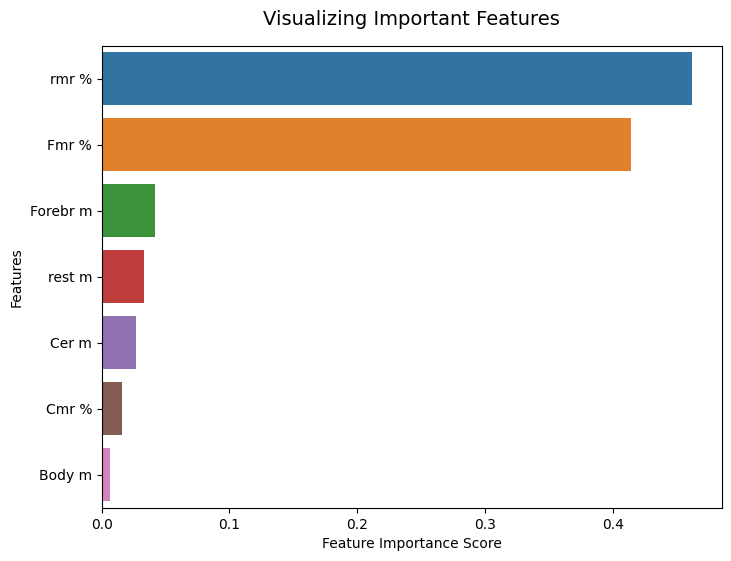

In [14]:
fig = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(GBR.feature_importances_, index=['Forebr m', 'Cer m', 'rest m', 'Body m',
                                                         'Fmr %', 'Cmr %', 'rmr %']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [15]:
# Human(included in data)
GBR.predict([[1200, 150, 120, 70000, 0.818, 0.102, 0.079]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.63097863e+10])

In [16]:
# Killer whale
GBR.predict([[5270, 753, 192, 3987500, 0.847, 0.121, 0.03]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.59956777e+10])

In [17]:
# Orangutan
GBR.predict([[414, 35, 40, 64475, 0.846, 0.071, 0.081]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.48190073e+10])

In [18]:
# Short-finned pilot whale
GBR.predict([[2431, 403, 91, 2200000, 0.831, 0.137, 0.031]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.56977361e+10])

In [19]:
# random
GBR.predict([[20, 4, 6, 2200, 0.666, 0.133, 0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([4.13363868e+08])